In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime  # Correct import

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')  # This should work now
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.express as px

In [4]:
import seaborn as sns
print(sns.__version__)  # Check if it imports and prints a version

0.13.2


In [5]:
data_pos = pd.read_csv(r'C:\Users\risha\Downloads\MRA_Rishabh\dataset_group.csv')


In [6]:
df = data_pos.copy()

In [7]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [8]:
df.shape

(20641, 3)

In [9]:
df.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [10]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [11]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')




In [12]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter
df['Week_Number'] = df['Date'].dt.isocalendar().week
df['Day_Name'] = df['Date'].dt.strftime('%A')


In [13]:
print("\n--- Summary Statistics ---")
print(f"Number of unique Dates: {df['Date'].nunique()}")
print(f"Number of unique Order IDs: {df['Order_id'].nunique()}")
print(f"Number of unique Products: {df['Product'].nunique()}")


--- Summary Statistics ---
Number of unique Dates: 603
Number of unique Order IDs: 1139
Number of unique Products: 37



--- Univariate Analysis: Date ---
Earliest Date: 2018-01-01 00:00:00
Latest Date: 2020-02-26 00:00:00


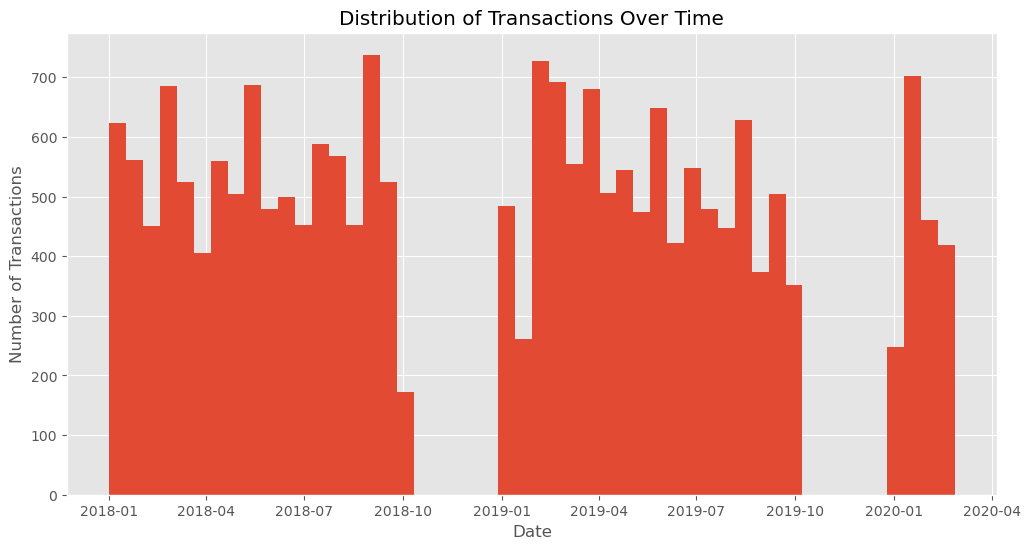

In [14]:
print("\n--- Univariate Analysis: Date ---")
print(f"Earliest Date: {df['Date'].min()}")
print(f"Latest Date: {df['Date'].max()}")

# Distribution of transactions over time
plt.figure(figsize=(12, 6))
df['Date'].hist(bins=50)
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

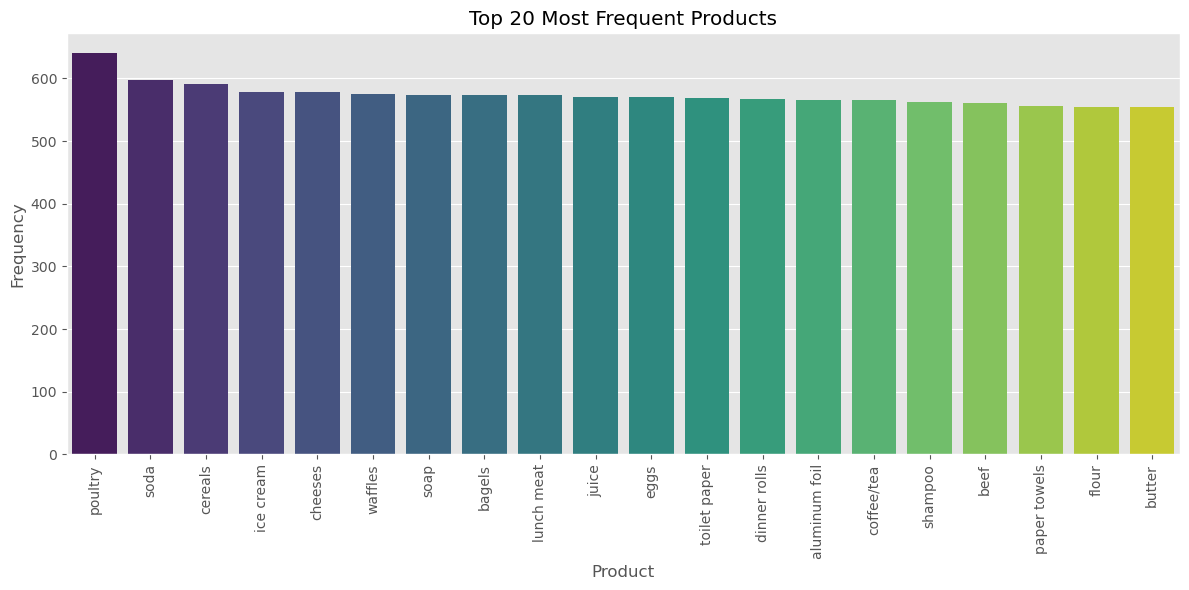


Plot: Top 20 Most Frequent Products


In [15]:

plt.figure(figsize=(12, 6))
product_counts = df['Product'].value_counts().nlargest(20)
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("\nPlot: Top 20 Most Frequent Products")

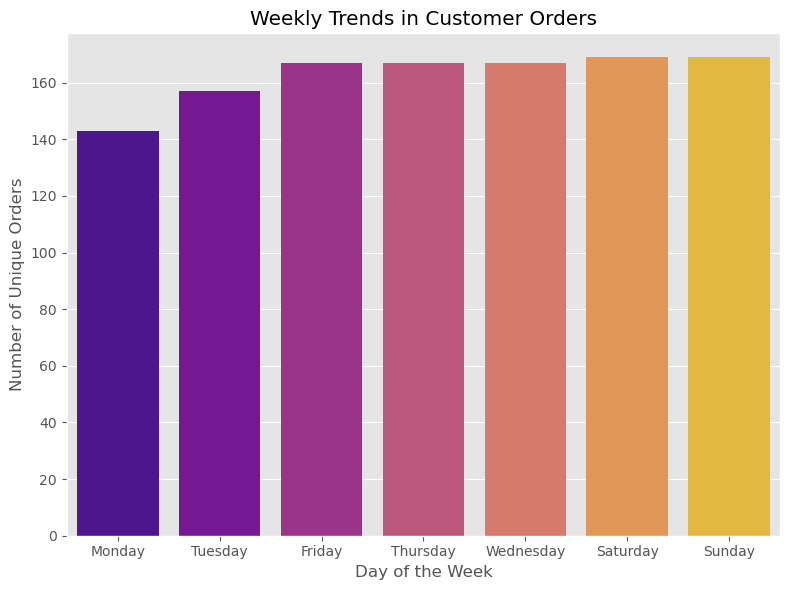


Plot: Weekly Trends in Customer Orders


In [16]:

weekly_counts = df.groupby(df['Date'].dt.day_name())['Order_id'].nunique().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette='plasma')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unique Orders')
plt.title('Weekly Trends in Customer Orders')
plt.tight_layout()
plt.show()
print("\nPlot: Weekly Trends in Customer Orders")

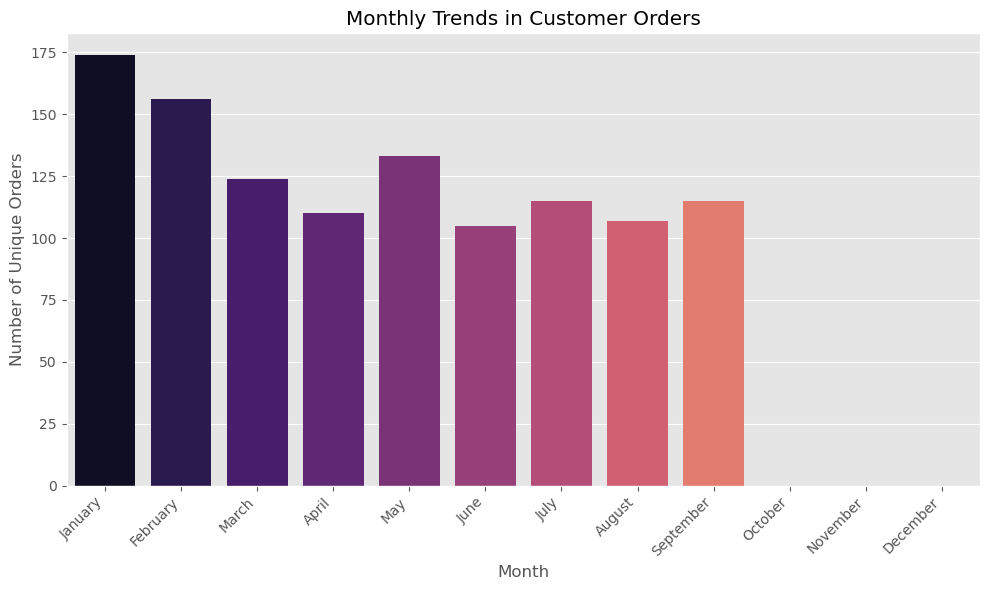


Plot: Monthly Trends in Customer Orders


In [17]:
# Create a proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group and count
monthly_counts = df.groupby(df['Date'].dt.month_name())['Order_id'].nunique()

# Reindex to correct order
monthly_counts = monthly_counts.reindex(month_order)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='magma')
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.title('Monthly Trends in Customer Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nPlot: Monthly Trends in Customer Orders")


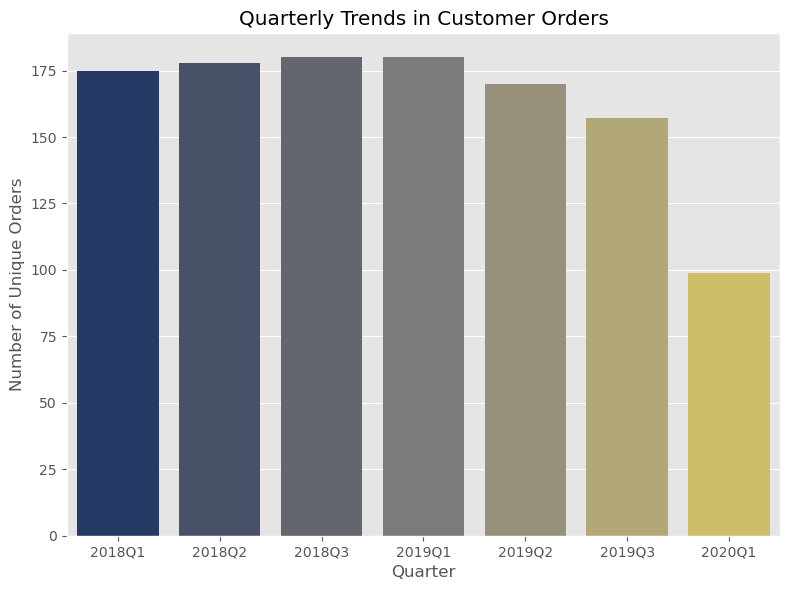


Plot: Quarterly Trends in Customer Orders


In [18]:

df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_counts = df.groupby('Quarter')['Order_id'].nunique()
plt.figure(figsize=(8, 6))
sns.barplot(x=quarterly_counts.index.astype(str), y=quarterly_counts.values, palette='cividis')
plt.xlabel('Quarter')
plt.ylabel('Number of Unique Orders')
plt.title('Quarterly Trends in Customer Orders')
plt.tight_layout()
plt.show()
print("\nPlot: Quarterly Trends in Customer Orders")

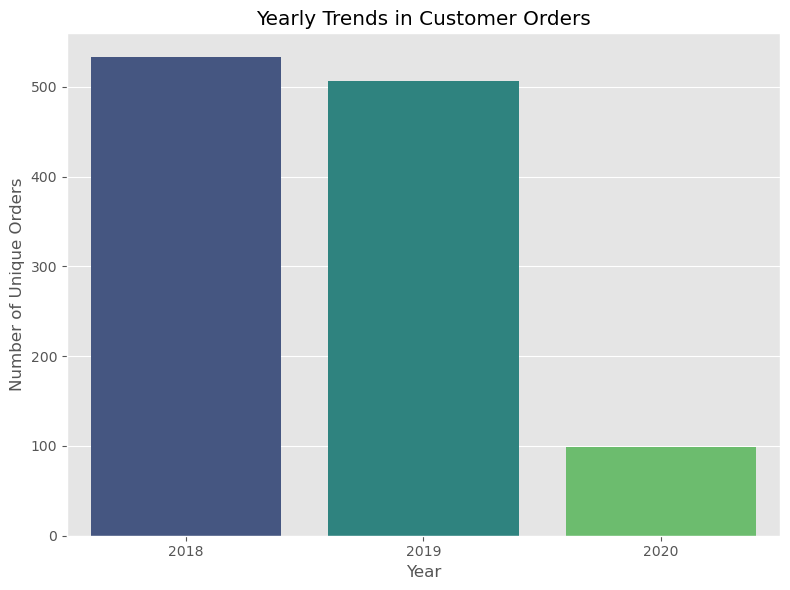


Plot: Yearly Trends in Customer Orders


In [19]:

yearly_counts = df.groupby(df['Date'].dt.year)['Order_id'].nunique()
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_counts.index.astype(int), y=yearly_counts.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Unique Orders')
plt.title('Yearly Trends in Customer Orders')
plt.tight_layout()
plt.show()
print("\nPlot: Yearly Trends in Customer Orders")

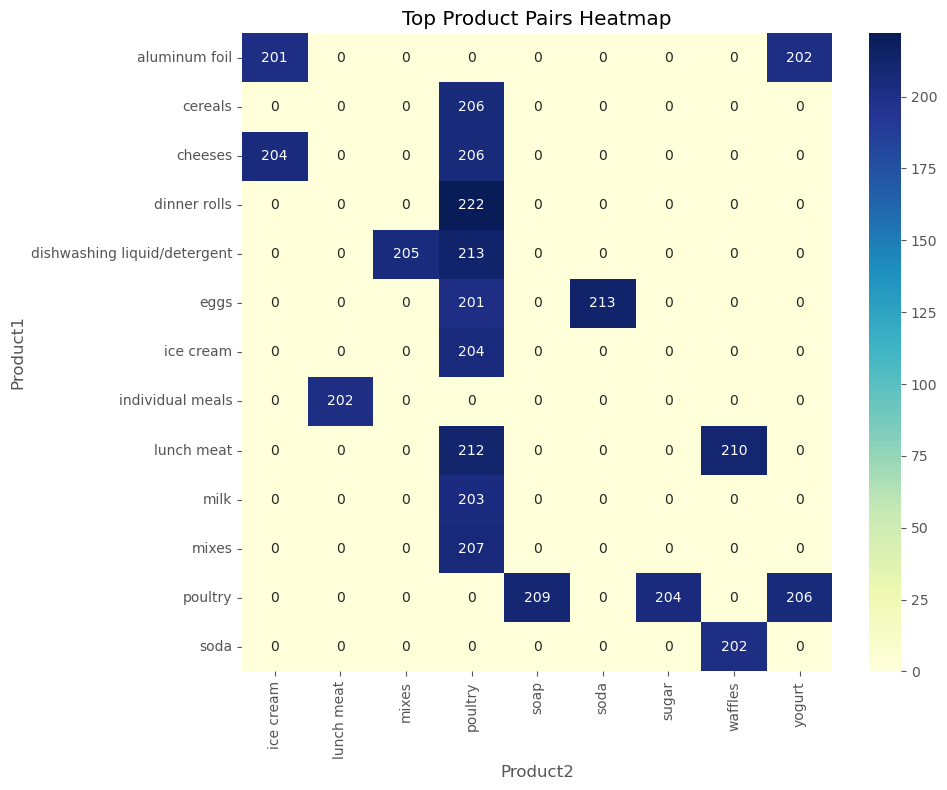

In [9]:

from itertools import combinations
from collections import Counter


# Assuming your DataFrame is already loaded into the variable 'df'
# If not, load it like this:
# try:
#     df = pd.read_csv('grocery_data.csv')
# except FileNotFoundError:
#     print("Error: grocery_data.csv not found.")
#     exit()

# Create product pairs within each order using the 'df' DataFrame
product_pairs = df.groupby('Order_id')['Product'].apply(lambda x: list(combinations(sorted(set(x)), 2)))
flat_pairs = [pair for sublist in product_pairs for pair in sublist]

pair_counts = Counter(flat_pairs)
top_pairs = dict(pair_counts.most_common(20))
pair_df = pd.DataFrame(top_pairs.items(), columns=['Pair', 'Count'])
pair_df[['Product1', 'Product2']] = pd.DataFrame(pair_df['Pair'].tolist(), index=pair_df.index)

pivot = pair_df.pivot_table(index='Product1', columns='Product2', values='Count', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Top Product Pairs Heatmap')
plt.tight_layout()
plt.show()

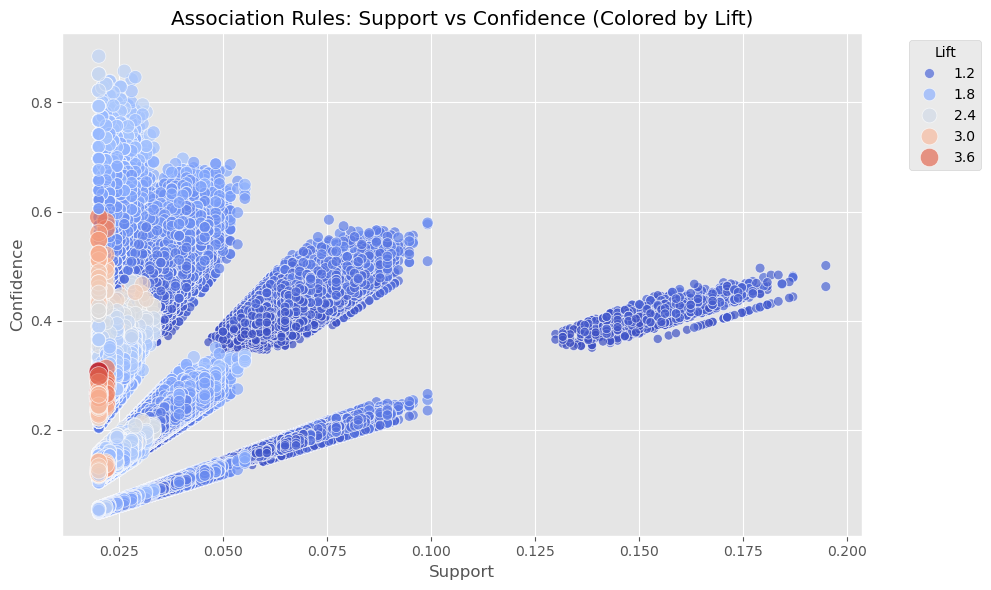

In [10]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Transaction format
transactions = df.groupby('Order_id')['Product'].apply(list).tolist()

# One-hot encode
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_te, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', size='lift', palette='coolwarm', sizes=(40, 200), alpha=0.7)
plt.title('Association Rules: Support vs Confidence (Colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


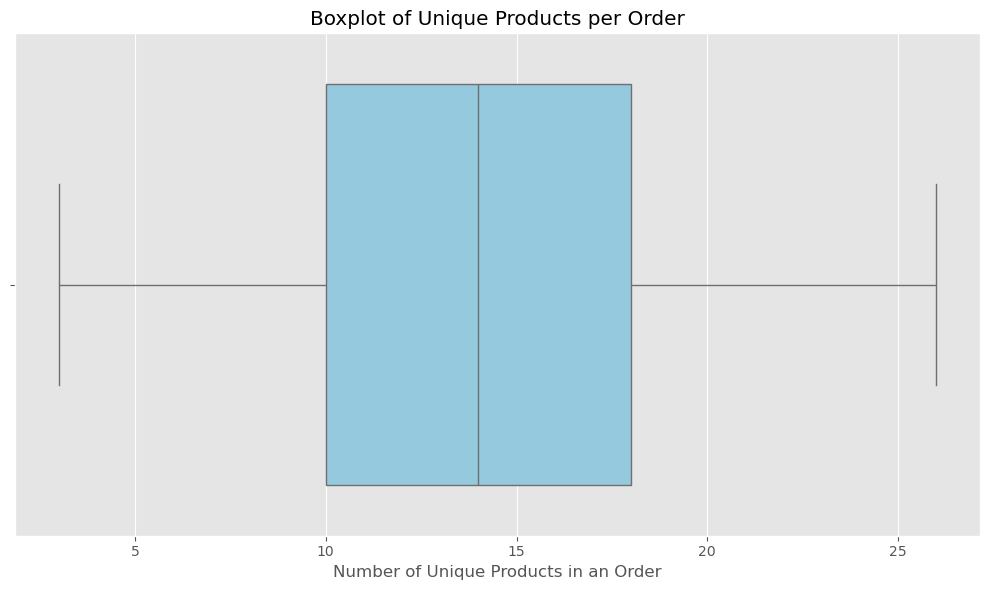

In [11]:
# Calculate basket size per order
basket_size = df.groupby('Order_id')['Product'].nunique().reset_index(name='Unique_Products')

plt.figure(figsize=(10, 6))
sns.boxplot(data=basket_size, x='Unique_Products', color='skyblue')
plt.title('Boxplot of Unique Products per Order')
plt.xlabel('Number of Unique Products in an Order')
plt.tight_layout()
plt.show()


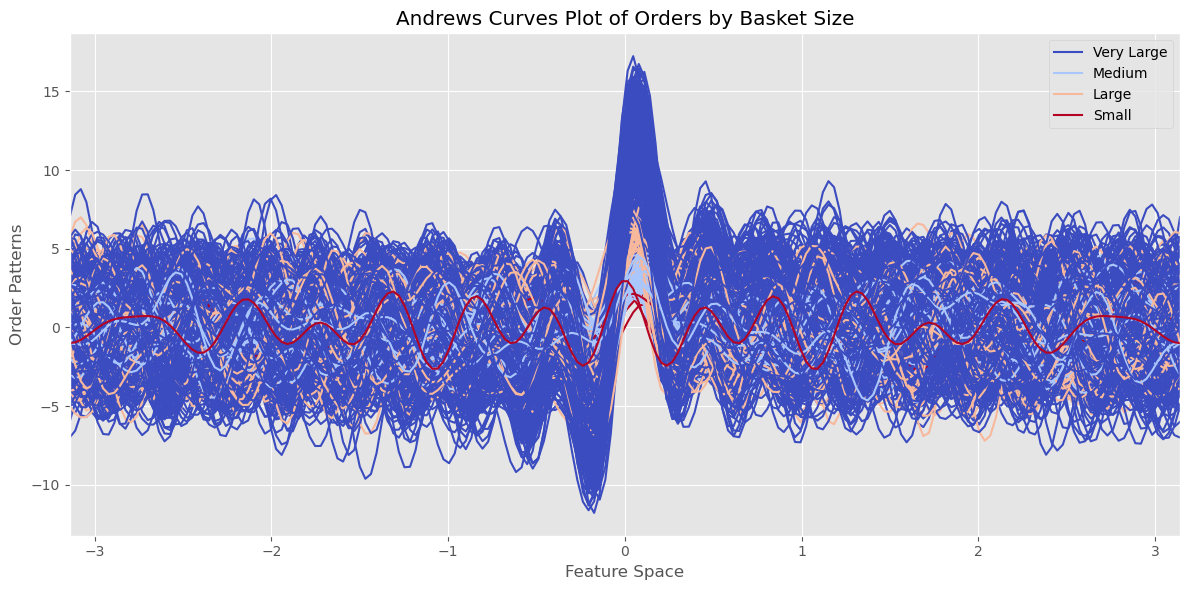

In [13]:
from mlxtend.preprocessing import TransactionEncoder
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare transactions list (list of items per order)
transactions = df.groupby('Order_id')['Product'].apply(list).tolist()

# Step 2: Encode transactions into one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_array, columns=te.columns_)

# Step 3: Add Basket_Size column (small, medium, large, very large)
basket_size = df_transactions.sum(axis=1)
df_transactions['Basket_Size'] = pd.cut(
    basket_size,
    bins=[0, 3, 6, 10, float('inf')],
    labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Step 4: Andrews Curves Plot
plt.figure(figsize=(12, 6))
andrews_curves(df_transactions, 'Basket_Size', colormap='coolwarm')
plt.title('Andrews Curves Plot of Orders by Basket Size')
plt.xlabel('Feature Space')
plt.ylabel('Order Patterns')
plt.grid(True)
plt.tight_layout()
plt.show()
